# Climate-Friendly Food Systems (CFFS) Labelling Project

### The University of British Columbia

***

## Part IV: Data Analysis

## Set up and Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import xml.etree.ElementTree as et
from xml.etree.ElementTree import parse
from datetime import datetime

In [2]:
# RUN ONLY ONCE
# os.chdir is used to change the current directory to the specified path
os.chdir("../") # Sets path to the repo folder as it is one level above where this file exists!
path = os.getcwd()
print(path)

/Users/vivaanwadhwa/Documents/GitHub/CFFS_sharon_2024


***
## Import Cleaned Datasets

In [3]:
"""
INPUT: a Dataframe
OUPUT: NONE
Description: Prints a description of the datasets
"""
def DescribeDataset(df):
    print(df.dtypes)
    print("\nShape: ", df.shape)
    display(df.head())

In [4]:
Items = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "AMS_data", "Items_List.csv"))
DescribeDataset(Items)

ItemId             object
Description        object
CaseQty           float64
CaseUOM            object
PakQty            float64
PakUOM             object
InventoryGroup     object
dtype: object

Shape:  (559, 7)


,ItemId,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup
0,I-1971,LIMES,0.25,ea,1.0,ea,N
1,I-8228,Grey Goose 1.14L,1.00,fl oz,1.0,fl oz,N
2,I-15803,Red Bull Watermelon,1.00,can,1.0,can,N
3,I-5505,Lettuce - Romaine,0.25,HEAD,1.0,HEAD,N
4,I-8667,ITEM GARLIC MAYO,2.00,fl oz,1.0,ml,N


In [5]:
Ingredients = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "AMS_data", "Ingredients_List.csv"))
DescribeDataset(Ingredients)

IngredientId     object
Qty             float64
Uom              object
Recipe           object
dtype: object

Shape:  (2158, 4)


,IngredientId,Qty,Uom,Recipe
0,I-1971,0.25,ea,R-17284
1,I-8228,1.00,fl oz,R-17284
2,I-15803,1.00,can,R-17284
3,I-5505,0.25,HEAD,R-18292
4,I-8667,2.00,fl oz,R-18292


In [6]:
Preps = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "AMS_data", "Preps_List_Cleaned.csv"))
DescribeDataset(Preps)

PrepId             object
Description        object
PakQty            float64
PakUOM             object
InventoryGroup     object
StdQty            float64
StdUom             object
dtype: object

Shape:  (24, 7)


,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom
0,P-17305,2022 Hummus prep,1600.0,g,N,1600.0,g
1,P-16793,2022 Pulled Pork Prep,6.0,Kg,Y,6000.0,g
2,P-18380,2023 Babaganoush Prep,750.0,g,N,750.0,g
3,P-18458,2023 Fresh burger Patty prep,2.6,Kg,Y,2600.0,g
4,P-18575,2023 Wings Hot sauce prep,1650.0,g,Y,1650.0,g


In [7]:
Products = pd.read_csv(os.path.join(os.getcwd(), "data", "preprocessed", "AMS_data", "Products_List.csv"))
DescribeDataset(Products)

ProdId         object
Description    object
SalesGroup     object
dtype: object

Shape:  (301, 3)


,ProdId,Description,SalesGroup
0,P-15019,Butter Chicken Prep 2023,N
1,P-18296,Teriyaki Tempeh Prep 2023,N
2,P-17366,Chicken Teriyaki Prep 2023,Y
3,P-18330,Tuscan Prep 2023,N
4,P-14560,2022 Caesar Wrap prep,N


In [8]:
Conversions = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "AMS_data", "Conversions_Added.csv"))
DescribeDataset(Conversions)

ConversionId       object
Multiplier        float64
ConvertFromQty    float64
ConvertFromUom     object
ConvertToQty      float64
ConvertToUom       object
dtype: object

Shape:  (134, 6)


,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,I-1971,0.003731,0.25,ea,16.75,g
1,I-15803,0.004000,1.00,can,250.00,ml
2,I-5505,0.001263,0.25,HEAD,49.50,g
3,I-11706,0.008547,1.00,ea,117.00,g
4,I-13308,0.024540,1.00,ea,40.75,g


In [9]:
mapping = pd.read_csv(os.path.join(os.getcwd(), "data", "mapping", "AMS_data", "Mapping.csv"))
DescribeDataset(mapping)

ItemId                                                     object
CategoryID                                                  int64
Description                                                object
CaseQty                                                   float64
CaseUOM                                                    object
PakQty                                                    float64
PakUOM                                                     object
InventoryGroup                                             object
Active Total Supply Chain Emissions (kg CO2 / kg food)    float64
g N lost/kg product                                       float64
Land Use (m^2)                                            float64
Freshwater Withdrawals (L/FU)                             float64
Stress-Weighted Water Use (L/FU)                          float64
dtype: object

Shape:  (456, 13)


,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
0,I-1971,35,LIMES,0.25,ea,1.0,ea,N,0.3942,2.70,0.00042,37.400,1345.500
1,I-8228,55,Grey Goose 1.14L,1.00,fl oz,1.0,fl oz,N,0.0000,0.00,0.00000,1.000,1.000
2,I-15803,31,Red Bull Watermelon,1.00,can,1.0,can,N,0.4306,2.70,0.00071,3.500,4.700
3,I-5505,36,Lettuce - Romaine,0.25,HEAD,1.0,HEAD,N,0.6220,7.90,0.00230,54.500,2483.400
4,I-8667,58,ITEM GARLIC MAYO,2.00,fl oz,1.0,ml,N,0.0000,6.75,0.00000,20.225,1134.925


In [10]:
# Check if there are any duplicates in the mapping dataframe, "ItemId" column? False is good.
check = mapping["ItemId"].duplicated().any()
check

False

In [11]:
mapping.loc[mapping["ItemId"] == 'I-2324']

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
39,I-2324,54,SPICE CHILI POWDER,80.0,g,110.0,g,Y,9.3703,6.75,0.031,24.9,220.3


### Unit Converter

In [12]:
# Import standard unit conversion information for items
Std_Unit = pd.read_csv(os.path.join(os.getcwd(), "data", "external", "standard_conversions.csv"))
Std_Unit.head()

,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
0,4.92890,1,tsp,4.92890,ml
1,14.78700,1,Tbsp,14.78700,ml
2,946.35000,1,qt,946.35000,ml
3,473.17625,1,pt,473.17625,ml
4,28.34950,1,oz,28.34950,g


In [13]:
# Import list of prep that need convert uom to standard uom manually
Manual_PrepU = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "update", "AMS_data", "Preps_UpdateUom.csv"))
Manual_PrepU.head()

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom
0,P-14356,[PREP KAPPA MAKI,6,PORT,N,1511.82,g
1,P-14560,2022 Caesar Wrap prep,1,ea,N,433.59,g
2,P-9003,2022 Gallery Burger prep,1,ea,N,501.82,g
3,P-17358,2022 Poutine Prep,1,PORT,N,705.80,g
4,P-15006,2022 Power Punch Salad prep,1,PORT,N,416.73,g


In [14]:
# NEW CELL ADDED NOV 21 
# For future iterations: Make sure Manual_PrepU has updated units of measurement.
# concatenate Manual_PrepU with Preps:
Preps = pd.concat([Manual_PrepU, Preps], ignore_index=True)

In [15]:
Preps

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom
0,P-14356,[PREP KAPPA MAKI,6.00,PORT,N,1511.82,g
1,P-14560,2022 Caesar Wrap prep,1.00,ea,N,433.59,g
2,P-9003,2022 Gallery Burger prep,1.00,ea,N,501.82,g
3,P-17358,2022 Poutine Prep,1.00,PORT,N,705.80,g
4,P-15006,2022 Power Punch Salad prep,1.00,PORT,N,416.73,g
...,...,...,...,...,...,...,...
68,P-6476,PREP SRIRACHA MAYONAISE,650.00,ml,N,650.00,ml
69,P-3237,PREP TERIYAKI SAUCE,76.00,L,N,76000.00,ml
70,P-6811,PREP VEGAN MAYO,2.00,L,N,2000.00,ml
71,P-15419,Spicy mayo prep 2023,1.25,L,N,1250.00,ml


In [16]:
# Add unit conversion info for preps into converter
Prep_cov = Manual_PrepU[['PrepId', 'PakQty','PakUOM','StdQty','StdUom']]
Prep_cov.insert(1, "Multiplier", '')
Prep_cov.columns = Conversions.columns

# Prep_cov.loc['Multiplier'] = Prep_cov['ConvertFromQty']/Prep_cov['ConvertToQty']
for index, row in Prep_cov.iterrows():
    # print(Prep_cov.loc[index, 'ConvertFromQty'])
    Prep_cov.loc[index, 'Multiplier'] = Prep_cov.loc[index, 'ConvertFromQty']/Prep_cov.loc[index, 'ConvertToQty']
Prep_cov.head()
Prep_cov.tail()


,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
44,P-18296,0.001314,1,PORT,761.120236,g
45,P-18330,0.001421,1,PORT,703.800000,g
46,P-15013,0.002,1,PORT,500.040059,g
47,P-18313,0.002002,1,PORT,499.500000,g
48,P-18049,0.001409,1,PORT,709.906236,g


In [18]:
# Drop duplicates and concatenate DataFrames: Conversions and Prep_cov to make a DataFrame: frames
frames = [Conversions, Prep_cov]
Conversions = pd.concat(frames).reset_index(drop=True, inplace=False).drop_duplicates()
Conversions.tail()

,ConversionId,Multiplier,ConvertFromQty,ConvertFromUom,ConvertToQty,ConvertToUom
178,P-18296,0.001314,1.0,PORT,761.120236,g
179,P-18330,0.001421,1.0,PORT,703.800000,g
180,P-15013,0.002,1.0,PORT,500.040059,g
181,P-18313,0.002002,1.0,PORT,499.500000,g
182,P-18049,0.001409,1.0,PORT,709.906236,g


In [19]:
# Seperate uoms that converted to 'ml' or 'g'
liquid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'ml', 'ConvertFromUom'].tolist()
solid_unit = Std_Unit.loc[Std_Unit['ConvertToUom'] == 'g', 'ConvertFromUom'].tolist()

In [20]:
# Construct a standard unit converter
def std_converter(qty, uom):
    if uom in Std_Unit['ConvertFromUom'].tolist():
        multiplier = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'Multiplier']
        Qty = float(qty)*float(multiplier)
        Uom = Std_Unit.loc[Std_Unit['ConvertFromUom'] == uom, 'ConvertToUom'].values[0]
    else:
        Qty = qty
        Uom = uom
    return (Qty, Uom)

In [21]:
# Construct a unit converter for specific items
spc_cov = list(filter(None, Conversions['ConversionId'].tolist()))
 
def spc_converter(ingre, qty, uom):
    if uom in liquid_unit + solid_unit:
        return std_converter(qty, uom)
    elif ingre in spc_cov:
        conversion = Conversions.loc[(Conversions['ConversionId'] == ingre) & (Conversions['ConvertFromUom'] == uom)
                                    & (Conversions['ConvertToUom'] == 'g')]
        conversion = conversion[conversion['Multiplier'] != 0]

        conversion.drop_duplicates(subset=['ConversionId'], inplace=True)
        multiplier = conversion['Multiplier']
        if multiplier.empty:
            return std_converter(qty, uom)
        else: 
            Qty = float(qty)/float(multiplier)
            Uom = conversion['ConvertToUom'].values[0]
            return (Qty, Uom)
    else:
        return std_converter(qty, uom)

In [23]:
# Test the spc_converter
spc_converter('I-1971', 1, 'g')

(1, 'g')

In [24]:
spc_converter('P-35132', 1, 'ea')

(1, 'ea')

## GHG Factors Calculation for Preps

In [25]:
# Created new columns with emissions factors
Preps['GHG Emission (g)'] = 0
Preps['GHG Emission(g)/StdUom'] = 0
Preps['N lost (g)'] = 0
Preps['N lost (g)/StdUom'] = 0
Preps['Freshwater Withdrawals (ml)'] = 0
Preps['Freshwater Withdrawals (ml)/StdUom'] = 0
Preps['Stress-Weighted Water Use (ml)'] = 0
Preps['Stress-Weighted Water Use (ml)/StdUom'] = 0
Preps['Land Use (m^2)'] = 0
Preps['Land Use (m^2)/StdUom'] = 0

In [26]:
Ingredients.head()

,IngredientId,Qty,Uom,Recipe
0,I-1971,0.25,ea,R-17284
1,I-8228,1.00,fl oz,R-17284
2,I-15803,1.00,can,R-17284
3,I-5505,0.25,HEAD,R-18292
4,I-8667,2.00,fl oz,R-18292


In [27]:
Preps.loc[Preps["PrepId"] == "P-67984"]

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom


In [28]:
Preps.head()

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom
0,P-14356,[PREP KAPPA MAKI,6.0,PORT,N,1511.82,g,0,0,0,0,0,0,0,0,0,0
1,P-14560,2022 Caesar Wrap prep,1.0,ea,N,433.59,g,0,0,0,0,0,0,0,0,0,0
2,P-9003,2022 Gallery Burger prep,1.0,ea,N,501.82,g,0,0,0,0,0,0,0,0,0,0
3,P-17358,2022 Poutine Prep,1.0,PORT,N,705.80,g,0,0,0,0,0,0,0,0,0,0
4,P-15006,2022 Power Punch Salad prep,1.0,PORT,N,416.73,g,0,0,0,0,0,0,0,0,0,0


In [29]:
# Changed on Nov 21 2023
def get_items_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    land = Preps.loc[index, "Land Use (m^2)"]

    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx, 'IngredientId']
        if ingre.startswith('I'):
            ghge_series = mapping.loc[mapping['ItemId'] == ingre, 'Active Total Supply Chain Emissions (kg CO2 / kg food)']
            nitro_fac_series = mapping.loc[mapping['ItemId'] == ingre, 'g N lost/kg product']
            water_fac_series = mapping.loc[mapping['ItemId'] == ingre, 'Freshwater Withdrawals (L/FU)']
            str_water_fac_series = mapping.loc[mapping['ItemId'] == ingre, 'Stress-Weighted Water Use (L/FU)']
            land_fac_series = mapping.loc[mapping["ItemId"] == ingre, "Land Use (m^2)"]

            Qty = float(ingres.loc[idx, 'Qty'])
            Uom = ingres.loc[idx, 'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
            else:
                qty = std_converter(Qty, Uom)[0]

            if not ghge_series.empty:
                ghg += qty * float(ghge_series.iloc[0])
            if not nitro_fac_series.empty:
                nitro += qty * float(nitro_fac_series.iloc[0]) / 1000
            if not water_fac_series.empty:
                water += qty * float(water_fac_series.iloc[0])
            if not str_water_fac_series.empty:
                str_water += qty * float(str_water_fac_series.iloc[0])
            if not land_fac_series.empty:
                land += qty * float(land_fac_series.iloc[0])

    Preps.loc[index, 'GHG Emission (g)'] = ghg
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg / weight
    Preps.loc[index, 'N lost (g)'] = nitro
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro / weight
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = water
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water / weight
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = str_water
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water / weight
    Preps.loc[index, 'Land Use (m^2)'] = land
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / weight

In [30]:
for index, row in Preps.iterrows():
    get_items_ghge_prep(index , row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_2030/2235193889.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)/float(multiplier)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_2030/2251989043.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '90.47322657902288' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Preps.loc[index, 'GHG Emission (g)'] = ghg
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_2030/2251989043.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.05984391434100811' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg / weig

In [31]:
mapping.loc[mapping["ItemId"] == "I-2324"]

,ItemId,CategoryID,Description,CaseQty,CaseUOM,PakQty,PakUOM,InventoryGroup,Active Total Supply Chain Emissions (kg CO2 / kg food),g N lost/kg product,Land Use (m^2),Freshwater Withdrawals (L/FU),Stress-Weighted Water Use (L/FU)
39,I-2324,54,SPICE CHILI POWDER,80.0,g,110.0,g,Y,9.3703,6.75,0.031,24.9,220.3


In [32]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for other preps as ingredients
def get_preps_ghge_prep(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'Land Use (m^2)']
    
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P') and len(ingres) > 1:
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            land_fac = Preps.loc[Preps['PrepId'] == ingre, 'Land Use (m^2)/StdUom']
            #print(ghge)
            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg += qty*float(ghge)
                nitro += qty*float(nitro_fac)
                water += qty*float(water_fac)
                str_water += qty*float(str_water_fac)
                
                # most recently added
                land += qty * float(land_fac)
            # print(ingre, Qty, Uom, qty, qty*float(ghge))
            # print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    
    # most recently added
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [33]:
Preps["Freshwater Withdrawals (ml)"].unique()

array([1.33764005e+03, 1.23204239e+05, 3.94804659e+05, 1.26227900e+05,
       1.13552400e+05, 3.14484347e+04, 2.33634961e+04, 3.89008508e+05,
       1.25462991e+04, 1.02952889e+05, 6.15864600e+03, 1.09512950e+05,
       2.56894607e+05, 5.39934541e+04, 8.46818026e+04, 6.66288220e+04,
       2.01771851e+05, 1.41776130e+05, 1.72910554e+05, 1.35408435e+05,
       1.86998962e+06, 2.46607163e+03, 7.03500053e+01, 1.05690000e+02,
       9.31824800e+04, 4.05667524e+04, 2.97296900e+04, 1.85455025e+02,
       2.30580025e+02, 2.60302767e+04, 0.00000000e+00, 7.01685000e+05,
       7.57751407e+04, 3.51915019e+02, 7.91306900e+04, 4.57121000e+06,
       4.26600000e+03, 1.50083020e+03, 3.55000000e+02, 1.76249431e+04,
       1.20487768e+04, 9.30587954e+04, 1.47098625e+05, 1.36195000e+03,
       5.34523596e+04, 1.06520000e+04, 1.45380025e+07, 5.54146297e+04,
       4.19629666e+06, 3.12218246e+04, 4.44000000e+03, 2.96100000e+04,
       1.60026322e+04, 8.49400000e+05, 1.13850029e+04, 2.49690000e+05,
      

In [34]:
# Calculate GHG, nitro, water footprints per gram/ml of each prep for linked preps
def link_preps(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Preps.loc[index,'PrepId']]
    ghg = Preps.loc[index, 'GHG Emission (g)']
    nitro = Preps.loc[index, 'N lost (g)']
    water = Preps.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Preps.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Preps.loc[index, 'StdQty']
    
    # most recently added
    land = Preps.loc[index, 'Land Use (m^2)']
    
    # Added this print statement July 31
    # print('Index:', index, '\nIngres:\n', ingres)
    if len(ingres) == 1:
        ingre = ingres.iloc[0]['IngredientId']
        if ingre.startswith('P'):
            print(ingres)
            ghge = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            
            # most recently added
            land_fac = Preps.loc[Preps['PrepId'] == ingre, "Land Use (m^2)/StdUom"]
            
            Qty = float(ingres.iloc[0]['Qty'])
            Uom = ingres.iloc[0]['Uom']
            if ingre in spc_cov:
                qty = spc_converter(ingre, Qty, Uom)[0]
                ghg = qty*float(ghge)
#                 ghg = qty*ghge
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            else:
                qty = std_converter(Qty, Uom)[0]
                ghg = qty*float(ghge)
                nitro = qty*float(nitro_fac)
                water = qty*float(water_fac)
                str_water = qty*float(str_water_fac)
                # most recently added
                land += qty * float(land_fac)
            # print(ingre, ghge, Qty, Uom, qty, weight)
            # print(ghg, nitro, water, str_water)
    Preps.loc[index, 'GHG Emission (g)'] = float(ghg)
    Preps.loc[index, 'GHG Emission(g)/StdUom'] = ghg/float(weight)
    Preps.loc[index, 'N lost (g)'] = float(nitro)
    Preps.loc[index, 'N lost (g)/StdUom'] = nitro/float(weight)
    Preps.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Preps.loc[index, 'Freshwater Withdrawals (ml)/StdUom'] = water/float(weight)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    Preps.loc[index, 'Stress-Weighted Water Use (ml)/StdUom'] = str_water/float(weight)
    # most recently added
    Preps.loc[index, 'Land Use (m^2)'] = float(land)
    Preps.loc[index, 'Land Use (m^2)/StdUom'] = land / float(weight)

In [35]:
for index, row in Preps.iterrows():
    link_preps(index, row)

In [36]:
for index, row in Preps.iterrows():
    get_preps_ghge_prep(index, row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_2030/2235193889.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)/float(multiplier)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_2030/7797307.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ghg += qty*float(ghge)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_2030/7797307.py:29: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nitro += qty*float(nitro_fac)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_2030/7797307.py:30: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  water += qty*

In [37]:
Preps.tail(30)

,PrepId,Description,PakQty,PakUOM,InventoryGroup,StdQty,StdUom,GHG Emission (g),GHG Emission(g)/StdUom,N lost (g),N lost (g)/StdUom,Freshwater Withdrawals (ml),Freshwater Withdrawals (ml)/StdUom,Stress-Weighted Water Use (ml),Stress-Weighted Water Use (ml)/StdUom,Land Use (m^2),Land Use (m^2)/StdUom
43,P-18361,Sub Truffle fries 2023 Prep,1.00,ea,N,272.773820,g,330.458935,1.211476,2.144427,0.007862,1.762494e+04,64.613763,9.100959e+05,3336.448982,1.045178,0.003832
44,P-18296,Teriyaki Tempeh Prep 2023,1.00,PORT,N,761.120236,g,753.378731,0.989829,2.076100,0.002728,1.204878e+04,15.830320,6.449957e+05,847.429397,2.280273,0.002996
45,P-18330,Tuscan Prep 2023,1.00,PORT,N,703.800000,g,427.371680,0.607235,2.364223,0.003359,1.291583e+05,183.515623,7.641317e+06,10857.228270,1.027808,0.001460
46,P-15013,Wings Prep 2023,1.00,PORT,Y,500.040059,g,2022.329153,4.044334,46.367102,0.092727,1.470986e+05,294.173681,1.331030e+05,266.184599,5.359738,0.010719
47,P-18313,Yam Fries prep 2023,1.00,PORT,N,499.500000,g,341.409350,0.683502,2.271850,0.004548,1.361950e+03,2.726627,4.032425e+04,80.729229,1.027285,0.002057
48,P-18049,Yellow Curry Prep Gall.2023,1.00,PORT,Y,709.906236,g,678.596143,0.955895,14.512936,0.020443,5.345236e+04,75.294957,6.436758e+05,906.705346,1.814091,0.002555
49,P-17305,2022 Hummus prep,1600.00,g,N,1600.000000,g,3208.511000,2.005319,9.329500,0.005831,1.065200e+04,6.657500,6.004215e+05,375.263438,21.482100,0.013426
50,P-16793,2022 Pulled Pork Prep,6.00,Kg,Y,6000.000000,g,79045.480000,13.174247,1079.865000,0.179978,1.453800e+07,2423.000417,4.363397e+08,72723.287083,168.878000,0.028146
51,P-18380,2023 Babaganoush Prep,750.00,g,N,750.000000,g,1528.914558,2.038553,12.069232,0.016092,6.679963e+04,89.066177,1.956117e+06,2608.155588,4.548005,0.006064
52,P-18458,2023 Fresh burger Patty prep,2.60,Kg,Y,2600.000000,g,103936.466150,39.975564,825.823903,0.317625,4.196297e+06,1613.960254,1.533817e+08,58992.963581,317.942285,0.122285


In [38]:
Ingredients.loc[Ingredients["IngredientId"] == "P-18329"]

,IngredientId,Qty,Uom,Recipe
1186,P-18329,3.0,oz,R-18270
2106,P-18329,30.0,g,R-18272


In [39]:
Preps["GHG Emission (g)"].unique()

array([1.80459281e+02, 7.29603111e+02, 7.61986696e+03, 1.05499570e+03,
       4.02036200e+02, 2.36742694e+03, 2.04546872e+02, 2.73431575e+03,
       4.68128321e+02, 1.94855150e+03, 1.22514447e+03, 7.38658510e+03,
       1.59093871e+03, 5.86980150e+02, 7.47809619e+02, 1.19598186e+03,
       1.11213859e+03, 9.74986092e+02, 1.65722669e+03, 7.46538401e+02,
       2.21877625e+04, 8.52718635e+01, 8.65506066e+00, 1.86006174e+03,
       2.98762988e+04, 7.53408968e+02, 4.38431668e+02, 1.49976757e+01,
       2.43679757e+01, 7.57421494e+01, 0.00000000e+00, 4.00968000e+03,
       1.36265459e+03, 4.19216506e+02, 1.57016632e+02, 6.25461867e+02,
       2.64641446e+02, 7.35005000e+03, 5.55660000e+01, 9.07588988e+01,
       1.31961919e+02, 2.07230000e+02, 3.30458935e+02, 7.53378731e+02,
       4.27371680e+02, 2.02232915e+03, 3.41409350e+02, 6.78596143e+02,
       3.20851100e+03, 7.90454800e+04, 1.52891456e+03, 1.03936466e+05,
       9.18600000e+01, 3.64092850e+03, 9.75467400e+03, 2.42449786e+03,
      

In [40]:
path = os.path.join(os.getcwd(), "data", "final", "AMS_2024_footprints", "Preps Footprints.csv")
Preps.to_csv(path, index = False, header = True)

## GHGe Calculation for Products

In [41]:
Products['Weight (g)'] = 0
Products['GHG Emission (g)'] = 0
Products['N lost (g)'] = 0
Products['Freshwater Withdrawals (ml)'] = 0
Products['Stress-Weighted Water Use (ml)'] = 0

# most recently added
Products['Land Use (m^2)'] = 0

In [42]:
Items["ItemId"].unique()

array(['I-1971', 'I-8228', 'I-15803', 'I-5505', 'I-8667', 'I-11706',
       'I-13308', 'I-15514', 'I-16699', 'I-16780', 'I-17976', 'I-4082',
       'I-14694', 'I-14715', 'I-15427', 'I-1789', 'I-2919', 'I-13956',
       'I-1660', 'I-1752', 'I-1782', 'I-1874', 'I-1982', 'I-2119',
       'I-2330', 'I-5198', 'I-1841', 'I-1941', 'I-1995', 'I-2102',
       'I-2343', 'I-2436', 'I-3804', 'I-4198', 'I-5283', 'I-5899',
       'I-13711', 'I-13733', 'I-2640', 'I-2958', 'I-1783', 'I-1927',
       'I-2066', 'I-2117', 'I-2324', 'I-2339', 'I-2367', 'I-2464',
       'I-5428', 'I-5803', 'I-7648', 'I-11651', 'I-13718', 'I-1894',
       'I-2116', 'I-2167', 'I-2442', 'I-5106', 'I-14979', 'I-1635',
       'I-4091', 'I-14882', 'I-2328', 'I-2335', 'I-2337', 'I-5796',
       'I-12752', 'I-2203', 'I-4014', 'I-10955', 'I-14532', 'I-16221',
       'I-16572', 'I-1637', 'I-1892', 'I-6243', 'I-7647', 'I-10942',
       'I-13719', 'I-17039', 'I-17040', 'I-9013', 'I-9665', 'I-10510',
       'I-2087', 'I-2209', 'I-13414

In [43]:
Products.head()

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml),Land Use (m^2)
0,P-15019,Butter Chicken Prep 2023,N,0,0,0,0,0,0
1,P-18296,Teriyaki Tempeh Prep 2023,N,0,0,0,0,0,0
2,P-17366,Chicken Teriyaki Prep 2023,Y,0,0,0,0,0,0
3,P-18330,Tuscan Prep 2023,N,0,0,0,0,0,0
4,P-14560,2022 Caesar Wrap prep,N,0,0,0,0,0,0


In [44]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for items ingredients only
def get_items_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index, 'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']

    # most recently added
    land = Products.loc[index, "Land Use (m^2)"]

    # print('Index:', index, '\nIngres:\n', ingres)
    
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx, 'IngredientId']
        
        # Check if the ingredient is present in the mapping
        mapping_ingre = mapping.loc[mapping['ItemId'] == ingre]
        if not mapping_ingre.empty:
            ghge = mapping_ingre['Active Total Supply Chain Emissions (kg CO2 / kg food)'].iloc[0]
            nitro_fac = mapping_ingre['g N lost/kg product'].iloc[0]
            water_fac = mapping_ingre['Freshwater Withdrawals (L/FU)'].iloc[0]
            str_water_fac = mapping_ingre['Stress-Weighted Water Use (L/FU)'].iloc[0]
            land_fac = mapping_ingre["Land Use (m^2)"].iloc[0]

            Qty = float(ingres.loc[idx, 'Qty'])
            Uom = ingres.loc[idx, 'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
            else:
                qty = std_converter(Qty, Uom)[0]

            weight += qty
            ghg += qty * float(ghge)
            nitro += qty * float(nitro_fac) / 1000
            water += qty * float(water_fac)
            str_water += qty * float(str_water_fac)
            land += qty * float(land_fac)

    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)

In [45]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for preps ingredients only

# New function below ommits type error of cannot convert the series to <class 'float'>
def get_preps_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    land = Products.loc[index, "Land Use (m^2)"]
    
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx,'IngredientId']
        if ingre.startswith('P'):
            # Check if the Series is empty and handle accordingly
            ghge_series = Preps.loc[Preps['PrepId'] == ingre, 'GHG Emission(g)/StdUom']
            nitro_fac_series = Preps.loc[Preps['PrepId'] == ingre, 'N lost (g)/StdUom']
            water_fac_series = Preps.loc[Preps['PrepId'] == ingre, 'Freshwater Withdrawals (ml)/StdUom']
            str_water_fac_series = Preps.loc[Preps['PrepId'] == ingre, 'Stress-Weighted Water Use (ml)/StdUom']
            land_fac_series = Preps.loc[Preps["PrepId"] == ingre, "Land Use (m^2)/StdUom"]

            Qty = float(ingres.loc[idx,'Qty'])
            Uom = ingres.loc[idx,'Uom']
            if ingre in Conversions['ConversionId'].tolist():
                qty = spc_converter(ingre, Qty, Uom)[0]
            else:
                qty = std_converter(Qty, Uom)[0]
            
            weight += qty
            ghg += qty * float(ghge_series.iloc[0]) if not ghge_series.empty else 0
            nitro += qty * float(nitro_fac_series.iloc[0]) if not nitro_fac_series.empty else 0
            water += qty * float(water_fac_series.iloc[0]) if not water_fac_series.empty else 0
            str_water += qty * float(str_water_fac_series.iloc[0]) if not str_water_fac_series.empty else 0
            land += qty * float(land_fac_series.iloc[0]) if not land_fac_series.empty else 0

    Products.loc[index, 'GHG Emission (g)'] = ghg
    Products.loc[index, 'Weight (g)'] = weight
    Products.loc[index, 'N lost (g)'] = nitro
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = water
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = str_water
    Products.loc[index, 'Land Use (m^2)'] = land

In [46]:
Ingredients

,IngredientId,Qty,Uom,Recipe
0,I-1971,0.25,ea,R-17284
1,I-8228,1.00,fl oz,R-17284
2,I-15803,1.00,can,R-17284
3,I-5505,0.25,HEAD,R-18292
4,I-8667,2.00,fl oz,R-18292
...,...,...,...,...
2153,I-2262,1.00,g,P-18049
2154,I-14434,80.00,g,P-18049
2155,I-15477,1.00,PORT,P-18049
2156,I-15637,20.00,g,P-18049


In [47]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml),Land Use (m^2)
0,P-15019,Butter Chicken Prep 2023,N,0,0,0,0,0,0
1,P-18296,Teriyaki Tempeh Prep 2023,N,0,0,0,0,0,0
2,P-17366,Chicken Teriyaki Prep 2023,Y,0,0,0,0,0,0
3,P-18330,Tuscan Prep 2023,N,0,0,0,0,0,0
4,P-14560,2022 Caesar Wrap prep,N,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
296,R-18272,Truffle Mushroom Pasta 2023,N,0,0,0,0,0,0
297,R-15427,Vegan Chipotle Mayo,N,0,0,0,0,0,0
298,R-15426,Vegan Tofu Scramble,N,0,0,0,0,0,0
299,R-15544,VEGGIE BENNY,N,0,0,0,0,0,0


In [48]:
Products["ProdId"].unique()

array(['P-15019', 'P-18296', 'P-17366', 'P-18330', 'P-14560', 'P-15006',
       'P-18266', 'P-18275', 'P-18313', 'P-18316', 'R-17284', 'R-18292',
       'R-15423', 'R-6243', 'R-13758', 'R-13736', 'R-13737', 'R-13747',
       'R-14906', 'R-12613', 'R-16573', 'R-15511', 'R-10484', 'R-17356',
       'R-16570', 'R-16576', 'R-17377', 'R-16775', 'R-16016', 'R-17360',
       'R-13937', 'R-17486', 'R-16833', 'R-16789', 'R-16787', 'R-17374',
       'R-17354', 'R-16099', 'R-14990', 'R-16778', 'R-12209', 'R-14827',
       'R-8990', 'R-16581', 'R-16748', 'R-17014', 'R-10589', 'R-17037',
       'R-16217', 'R-14715', 'R-17027', 'R-17314', 'R-17369', 'R-17352',
       'R-14981', 'R-16760', 'R-17378', 'R-14905', 'R-11631', 'R-9017',
       'R-15449', 'R-14525', 'R-16855', 'R-14507', 'R-14271', 'R-15438',
       'R-16791', 'R-16574', 'R-17039', 'R-16794', 'R-16773', 'R-16831',
       'R-17371', 'R-17013', 'R-16834', 'R-17304', 'R-17302', 'R-17316',
       'R-17301', 'R-15047', 'R-17306', 'R-9016', 'R-1

In [49]:
# Calculate GHG, nitro, water footprints per gram/ml of each product for other products ingredients

def get_products_ghge(index, row):
    ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index, 'ProdId']]
    ghg = Products.loc[index, 'GHG Emission (g)']
    nitro = Products.loc[index, 'N lost (g)']
    water = Products.loc[index, 'Freshwater Withdrawals (ml)']
    str_water = Products.loc[index, 'Stress-Weighted Water Use (ml)']
    weight = Products.loc[index, 'Weight (g)']
    
    # most recently added
    land = Products.loc[index, 'Land Use (m^2)']
    
    # print('Index:', index, '\nIngres:\n', ingres)
    # print('Index:', index, '\nIngres:\n', ingres)
    for idx, row in ingres.iterrows():
        ingre = ingres.loc[idx, 'IngredientId']
        if ingre.startswith('R'):
            mapping_ingre = Products.loc[Products['ProdId'] == ingre]
            if not mapping_ingre.empty:
                ghge = mapping_ingre['GHG Emission (g)'].iloc[0]
                nitro_fac = mapping_ingre['N lost (g)'].iloc[0]
                water_fac = mapping_ingre['Freshwater Withdrawals (ml)'].iloc[0]
                str_water_fac = mapping_ingre['Stress-Weighted Water Use (ml)'].iloc[0]
                
                # most recently added
                land_fac = mapping_ingre["Land Use (m^2)"].iloc[0]
                
                Weight = mapping_ingre['Weight (g)'].iloc[0]
                Qty = float(ingres.loc[idx, 'Qty'])
                ghg += Qty * float(ghge)
                nitro += Qty * float(nitro_fac)
                water += Qty * float(water_fac)
                str_water += Qty * float(str_water_fac)
                weight += Qty * float(Weight)
                # print(ingre, Qty, float(ghge), Qty*float(ghge))
                # print(ingre, Qty, float(ghge), Qty*float(ghge))
    Products.loc[index, 'GHG Emission (g)'] = float(ghg)
    Products.loc[index, 'Weight (g)'] = float(weight)
    Products.loc[index, 'N lost (g)'] = float(nitro)
    Products.loc[index, 'Freshwater Withdrawals (ml)'] = float(water)
    Products.loc[index, 'Stress-Weighted Water Use (ml)'] = float(str_water)
    
    # most recently added
    Products.loc[index, 'Land Use (m^2)'] = float(land)


In [50]:
for index, row in Products.iterrows():
    get_items_ghge(index, row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_2030/2235193889.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)/float(multiplier)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_2030/3899604546.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)*float(multiplier)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_2030/420666723.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '747.809619313084' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Products.loc[index, 'GHG Emission (g)'] = float(ghg)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_2030/420666723.py:42: FutureWarning: Setting an 

In [51]:
for index, row in Products.iterrows():
    get_preps_ghge(index, row)

/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_2030/2235193889.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)/float(multiplier)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_2030/2235193889.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)/float(multiplier)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_2030/3899604546.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Qty = float(qty)*float(multiplier)
/var/folders/bq/zkgc6_d969x_x5nsl5fy0vkh0000gn/T/ipykernel_2030/3899604546.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0])

In [52]:
for index, row in Products.iterrows():
    get_products_ghge(index, row)

In [53]:
# ONLY RUN CELL IF NOT ALL PREPS have standardized units after manual changes
# # Filter out products using preps with unknown units
# Preps_Nonstd = pd.read_csv(os.path.join(os.getcwd(), "data", "cleaning", "AMS_data", "Preps_NonstdUom.csv"))
# Preps_Nonstd

In [54]:
# # ONLY RUN CELL IF NOT ALL PREPS have standardized units after manual changes
# def filter_products(index, row):
#     ingres = Ingredients.loc[Ingredients['Recipe'] == Products.loc[index,'ProdId']]
#     #print(ingres)
#     for idx, row in ingres.iterrows():
#         ingre = ingres.loc[idx,'IngredientId']
#         if ingre in Preps_Nonstd['PrepId'].tolist():
#             print(ingre, index, Products.loc[index,'ProdId'])
#             Products.drop(index, inplace=True)
#             break

In [55]:
# # ONLY RUN CELL IF NOT ALL PREPS have standardized units after manual changes
# for index, row in Products.iterrows():
#     filter_products(index, row)

In [56]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Freshwater Withdrawals (ml),Stress-Weighted Water Use (ml),Land Use (m^2)
0,P-15019,Butter Chicken Prep 2023,N,382.007004,747.809619,6.262882,84681.802563,4.072167e+06,1.387041
1,P-18296,Teriyaki Tempeh Prep 2023,N,384.350600,753.378731,2.076100,12048.776760,6.449957e+05,2.280273
2,P-17366,Chicken Teriyaki Prep 2023,Y,385.670500,1195.981859,20.921744,66628.822000,1.779095e+05,3.529265
3,P-18330,Tuscan Prep 2023,N,298.012999,427.371680,2.364223,129158.295419,7.641317e+06,1.027808
4,P-14560,2022 Caesar Wrap prep,N,415.597292,729.603111,8.914526,123204.238542,4.939941e+06,1.666274
...,...,...,...,...,...,...,...,...,...
296,R-18272,Truffle Mushroom Pasta 2023,N,342.824999,1539.977637,8.291102,84690.611428,5.556776e+06,2.927251
297,R-15427,Vegan Chipotle Mayo,N,1150.000000,3033.600000,1.212500,4633.750000,1.780388e+05,12.180000
298,R-15426,Vegan Tofu Scramble,N,50.280000,48.810812,0.339712,2217.764000,1.830306e+04,0.087333
299,R-15544,VEGGIE BENNY,N,225.000000,342.127000,1.802500,21777.500000,6.783360e+05,1.816600


In [57]:
Products['Freshwater Withdrawals (L)'] = round(Products['Freshwater Withdrawals (ml)']/1000, 2)
Products['Stress-Weighted Water Use (L)'] = round(Products['Stress-Weighted Water Use (ml)']/1000, 2)
Products = Products.drop(columns=['Freshwater Withdrawals (ml)', 'Stress-Weighted Water Use (ml)'])

In [58]:
Products['GHG Emission (g) / 100g'] = round(100*Products['GHG Emission (g)']/Products['Weight (g)'], 2)
Products['N lost (g) / 100g'] = round(100*Products['N lost (g)']/Products['Weight (g)'], 2)
Products['Freshwater Withdrawals (L) / 100g'] = round(100*Products['Freshwater Withdrawals (L)']/Products['Weight (g)'], 2)
Products['Stress-Weighted Water Use (L) / 100g'] = round(100*Products['Stress-Weighted Water Use (L)']/Products['Weight (g)'], 2)

# most recently added
Products['Land Use (m^2) / 100g'] = round(100 * Products['Land Use (m^2)'] / Products['Weight (g)'], 2)

In [59]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g
0,P-15019,Butter Chicken Prep 2023,N,382.007004,747.809619,6.262882,1.387041,84.68,4072.17,195.76,1.64,22.17,1065.99,0.36
1,P-18296,Teriyaki Tempeh Prep 2023,N,384.350600,753.378731,2.076100,2.280273,12.05,645.00,196.01,0.54,3.14,167.82,0.59
2,P-17366,Chicken Teriyaki Prep 2023,Y,385.670500,1195.981859,20.921744,3.529265,66.63,177.91,310.10,5.42,17.28,46.13,0.92
3,P-18330,Tuscan Prep 2023,N,298.012999,427.371680,2.364223,1.027808,129.16,7641.32,143.41,0.79,43.34,2564.09,0.34
4,P-14560,2022 Caesar Wrap prep,N,415.597292,729.603111,8.914526,1.666274,123.20,4939.94,175.56,2.14,29.64,1188.64,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,R-18272,Truffle Mushroom Pasta 2023,N,342.824999,1539.977637,8.291102,2.927251,84.69,5556.78,449.20,2.42,24.70,1620.88,0.85
297,R-15427,Vegan Chipotle Mayo,N,1150.000000,3033.600000,1.212500,12.180000,4.63,178.04,263.79,0.11,0.40,15.48,1.06
298,R-15426,Vegan Tofu Scramble,N,50.280000,48.810812,0.339712,0.087333,2.22,18.30,97.08,0.68,4.42,36.40,0.17
299,R-15544,VEGGIE BENNY,N,225.000000,342.127000,1.802500,1.816600,21.78,678.34,152.06,0.80,9.68,301.48,0.81


In [60]:
Products.shape

(301, 14)

In [61]:
path = os.path.join(os.getcwd(), "data", "final", "AMS_2024_footprints", "Recipes Footprints.csv")
Products.to_csv(path, index = False, header = True)

## Data Visualization

In [62]:
path = os.path.join(os.getcwd(), "reports", "figures/")

<Axes: >

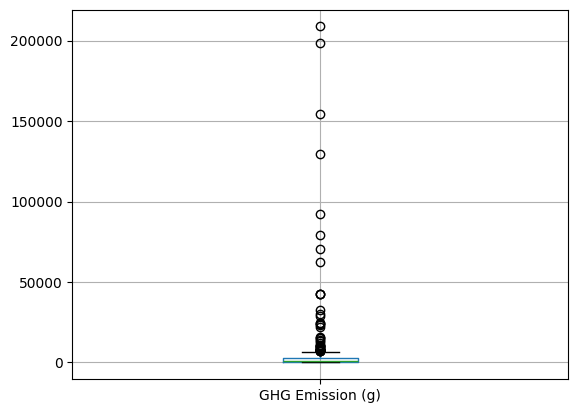

In [63]:
Products.boxplot(column=['GHG Emission (g)'], return_type='axes')

In [64]:
Products.boxplot(column=['N lost (g)'], return_type='axes')

<Axes: >

In [65]:
Products.boxplot(column=['Freshwater Withdrawals (L)'], return_type='axes')

<Axes: >

In [66]:
Products.boxplot(column=['Stress-Weighted Water Use (L)'], return_type='axes')

<Axes: >

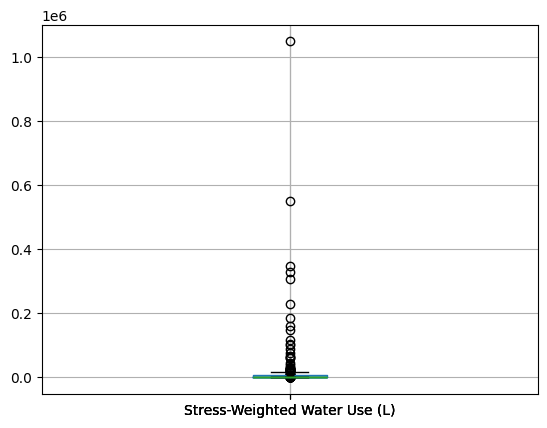

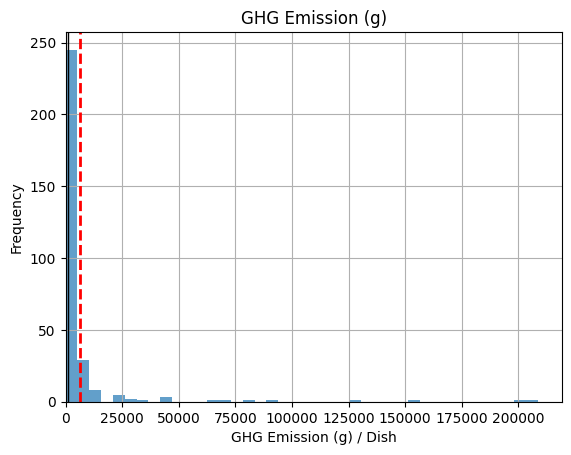

In [67]:
# These figures were not loading earlier because there were not any folders for the path required, so now that is working
Products.hist(column=['GHG Emission (g)'], bins= 40, alpha = 0.7)
plt.axvline(Products['GHG Emission (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
plt.axvline(Products['GHG Emission (g)'].median(), color='k', linewidth=1, label = 'median')
plt.xlabel('GHG Emission (g) / Dish')
plt.ylabel('Frequency')
plt.xlim(left=0)
plt.savefig(path + 'GHGe_dish.png')
plt.show()

In [68]:
# Using isna() or isnull() to find NaN values in 'GHG Emission (g) / 100g' column
rows_with_nan = Products[Products['GHG Emission (g) / 100g'].isna()]

# Display the rows containing NaN values
print(rows_with_nan)


      ProdId             Description SalesGroup  Weight (g)  GHG Emission (g)  \
150  R-18341           2023 HH Fries          N         0.0               0.0   
265  R-14339            nigiri rice           N         0.0               0.0   
271  R-15513  PICNIC Mac&Cheese Meal          N         0.0               0.0   

     N lost (g)  Land Use (m^2)  Freshwater Withdrawals (L)  \
150         0.0             0.0                         0.0   
265         0.0             0.0                         0.0   
271         0.0             0.0                         0.0   

     Stress-Weighted Water Use (L)  GHG Emission (g) / 100g  \
150                            0.0                      NaN   
265                            0.0                      NaN   
271                            0.0                      NaN   

     N lost (g) / 100g  Freshwater Withdrawals (L) / 100g  \
150                NaN                                NaN   
265                NaN                         

In [69]:
# Products.hist(column=['N lost (g)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['N lost (g)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['N lost (g)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('N lost (g) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'N lost_dish.png')
# plt.show()

In [70]:
# Products.hist(column=['N lost (g) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['N lost (g) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['N lost (g) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('N lost (g) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'N lost_100g.png')
# plt.show()

In [71]:
# Products.hist(column=['Freshwater Withdrawals (L)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Freshwater Withdrawals (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Freshwater Withdrawals (L)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Freshwater Withdrawals (L) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Fresh water_dish.png')
# plt.show()

In [72]:
# Products.hist(column=['Freshwater Withdrawals (L) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Freshwater Withdrawals (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Freshwater Withdrawals (L) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Fresh water_100g.png')
# plt.show()

In [73]:
# Products.hist(column=['Stress-Weighted Water Use (L)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Stress-Weighted Water Use (L)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Stress-Weighted Water Use (L)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Stress-Weighted Water Use (L) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Stress water_dish.png')
# plt.show()

In [74]:
# Products.hist(column=['Stress-Weighted Water Use (L) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Stress-Weighted Water Use (L) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Stress-Weighted Water Use (L) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Stress water_100g.png')
# plt.show()

In [75]:
# Products.hist(column=['Land Use (m^2)'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Land Use (m^2)'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Land Use (m^2)'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Land Use (m^2) / Dish')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Land_Use_(m^2).png')
# plt.show()

In [76]:
# Products.hist(column=['Land Use (m^2) / 100g'], bins= 40, alpha = 0.7)
# plt.axvline(Products['Land Use (m^2) / 100g'].mean(), color='r', linestyle='dashed', linewidth=2, label = 'mean' )
# plt.axvline(Products['Land Use (m^2) / 100g'].median(), color='k', linewidth=1, label = 'median')
# plt.xlabel('Land Use (m^2) / 100g')
# plt.ylabel('Frequency')
# plt.xlim(left=0)
# plt.savefig(path + 'Land_Use_(m^2)_per_100g.png')
# plt.show()

In [77]:
Products

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g
0,P-15019,Butter Chicken Prep 2023,N,382.007004,747.809619,6.262882,1.387041,84.68,4072.17,195.76,1.64,22.17,1065.99,0.36
1,P-18296,Teriyaki Tempeh Prep 2023,N,384.350600,753.378731,2.076100,2.280273,12.05,645.00,196.01,0.54,3.14,167.82,0.59
2,P-17366,Chicken Teriyaki Prep 2023,Y,385.670500,1195.981859,20.921744,3.529265,66.63,177.91,310.10,5.42,17.28,46.13,0.92
3,P-18330,Tuscan Prep 2023,N,298.012999,427.371680,2.364223,1.027808,129.16,7641.32,143.41,0.79,43.34,2564.09,0.34
4,P-14560,2022 Caesar Wrap prep,N,415.597292,729.603111,8.914526,1.666274,123.20,4939.94,175.56,2.14,29.64,1188.64,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,R-18272,Truffle Mushroom Pasta 2023,N,342.824999,1539.977637,8.291102,2.927251,84.69,5556.78,449.20,2.42,24.70,1620.88,0.85
297,R-15427,Vegan Chipotle Mayo,N,1150.000000,3033.600000,1.212500,12.180000,4.63,178.04,263.79,0.11,0.40,15.48,1.06
298,R-15426,Vegan Tofu Scramble,N,50.280000,48.810812,0.339712,0.087333,2.22,18.30,97.08,0.68,4.42,36.40,0.17
299,R-15544,VEGGIE BENNY,N,225.000000,342.127000,1.802500,1.816600,21.78,678.34,152.06,0.80,9.68,301.48,0.81


In [81]:
Products.to_csv("data/preprocessed/AMS_data/Products_List.csv", index = False)
